# Anomaly Scoring
Generate an anomaly detection model with Isolation Forest model and
Analyze the distribution of anomaly scores  to identify potential thresholds for flagging suspicious network traffic.




## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/colab_notebooks/CICIDS2017

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/colab_notebooks/CICIDS2017


In [ ]:
import os
import pandas as pd
import numpy as np

DIR_PATH = "MachineLearningCVE"

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv(os.path.join(DIR_PATH, "processed_data.csv"))

# Explore data types and missing values
print(df.shape)

(2520798, 67)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


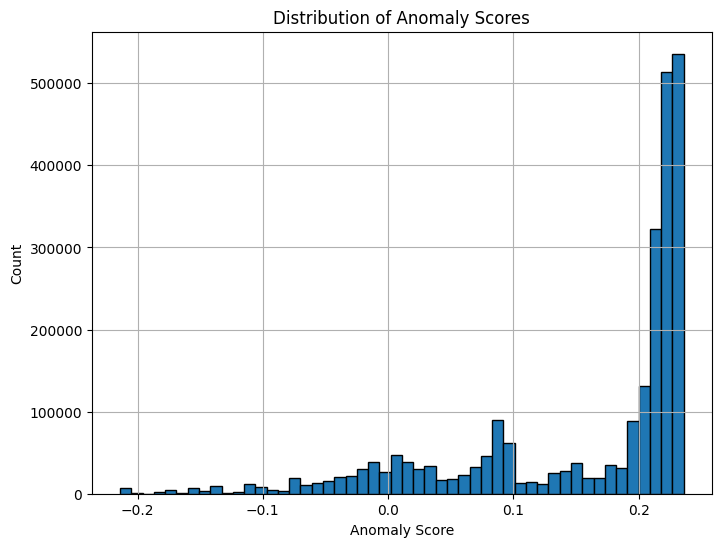

Threshold at 90th percentile: -0.1461
Threshold at 95th percentile: -0.1417
Threshold at 99th percentile: -0.1378


In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Select the seven most impactful features from the intrusion detection model
features = ['Bwd Packet Length Std', 'Avg Bwd Segment Size', 'Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Packet Length Variance', 'Average Packet Size']

# Train Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed
isolation_forest.fit(df[features])

# Generate anomaly scores
anomaly_scores = isolation_forest.decision_function(df[features])

# Analyze anomaly score distribution
plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores, bins=50, edgecolor='black')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.title('Distribution of Anomaly Scores')
plt.grid(True)
plt.show()

# (Optional) Calculate percentiles for potential thresholds
percentiles = [0.9, 0.95, 0.99]  # Example percentiles
for percentile in percentiles:
  threshold = np.percentile(anomaly_scores, percentile)
  print(f"Threshold at {percentile*100:.0f}th percentile: {threshold:.4f}")